
# Lecture 1 — Part 1: Forward Kinematics (FK) of a 2‑DOF Planar Manipulator

**Goal:** Build intuition for a simple 2‑link planar arm (links of length `l1` and `l2`) and visualize its workspace and end‑effector pose.

**Concepts covered**
- Robot configuration \(q = [\theta_1, \theta_2]\)
- Forward kinematics \(p = f_{FK}(q)\)
- Reachable workspace (without obstacles)
- Singularities (qualitative discussion)

**Based on**: Classic robotics texts (Siciliano & Khatib, Lynch & Park) and the simplified SO‑100 example.


In [1]:

# Imports
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin

# For nice plots inline in Colab
# %matplotlib inline  # Uncomment when running in Colab/Jupyter



## 1. Kinematic model

For a 2‑link planar arm with link lengths \(l_1, l_2\) and joint angles \(\theta_1, \theta_2\):

\[
p_x = l_1\cos\theta_1 + l_2\cos(\theta_1 + \theta_2), \quad
p_y = l_1\sin\theta_1 + l_2\sin(\theta_1 + \theta_2).
\]


In [2]:

def fk(theta1, theta2, l1=1.0, l2=1.0):
    px = l1*np.cos(theta1) + l2*np.cos(theta1 + theta2)
    py = l1*np.sin(theta1) + l2*np.sin(theta1 + theta2)
    return np.array([px, py])

def forward_kinematics(q, l1=1.0, l2=1.0):
    theta1, theta2 = q
    return fk(theta1, theta2, l1, l2)



## 2. Visualize the arm for a given configuration


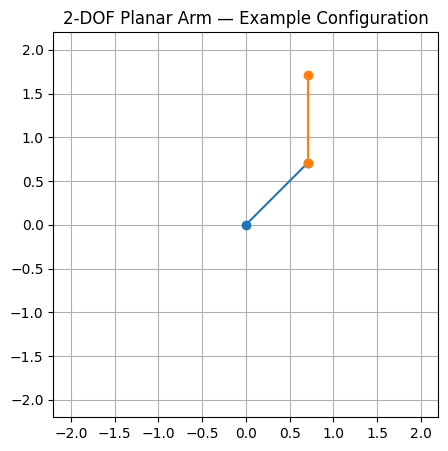

In [3]:

def plot_arm(q, l1=1.0, l2=1.0, ax=None, show=True, title=None, limits=(-2.2,2.2,-2.2,2.2)):
    theta1, theta2 = q
    base = np.array([0.0, 0.0])
    joint = np.array([l1*np.cos(theta1), l1*np.sin(theta1)])
    ee = joint + np.array([l2*np.cos(theta1+theta2), l2*np.sin(theta1+theta2)])

    if ax is None:
        fig, ax = plt.subplots(figsize=(5,5))
    ax.plot([base[0], joint[0]], [base[1], joint[1]], marker='o')
    ax.plot([joint[0], ee[0]], [joint[1], ee[1]], marker='o')
    ax.set_aspect('equal')
    ax.set_xlim(limits[0], limits[1])
    ax.set_ylim(limits[2], limits[3])
    ax.grid(True)
    if title:
        ax.set_title(title)
    if show:
        plt.show()

# Example pose
q_example = np.deg2rad([45, 45])
plot_arm(q_example, title="2‑DOF Planar Arm — Example Configuration")



## 3. Workspace sampling

We sweep \(\theta_1, \theta_2\) across \([-\pi, \pi]\) to see the reachable set.


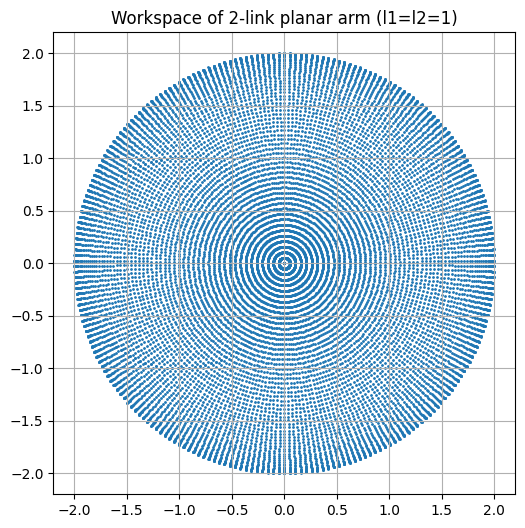

In [4]:

def sample_workspace(l1=1.0, l2=1.0, n=200):
    t1 = np.linspace(-np.pi, np.pi, n)
    t2 = np.linspace(-np.pi, np.pi, n)
    P = []
    for th1 in t1:
        for th2 in t2:
            P.append(fk(th1, th2, l1, l2))
    return np.array(P)

P = sample_workspace(1.0, 1.0, n=120)
plt.figure(figsize=(6,6))
plt.scatter(P[:,0], P[:,1], s=1)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.title("Workspace of 2‑link planar arm (l1=l2=1)")
plt.show()



## 4. (Optional) Interactive sliders in Colab

Uncomment the cell below in Colab to get sliders for \(\theta_1, \theta_2\).


In [5]:
# In Colab, uncomment this cell to use interactive sliders
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider

def _interactive(theta1=0.0, theta2=0.0):
    fig, ax = plt.subplots(figsize=(5,5))
    plot_arm([theta1, theta2], ax=ax, show=False, title=f"theta1={theta1:.2f}, theta2={theta2:.2f}")
    plt.show()

interact(_interactive,
         theta1=FloatSlider(min=-np.pi, max=np.pi, step=0.01, value=0.0),
         theta2=FloatSlider(min=-np.pi, max=np.pi, step=0.01, value=0.0))

interactive(children=(FloatSlider(value=0.0, description='theta1', max=3.141592653589793, min=-3.1415926535897…

<function __main__._interactive(theta1=0.0, theta2=0.0)>